In [ ]:
%matplotlib widget
import pickle
import rasterio
import numpy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import geopandas

# Reading Data

In [53]:
data_dir = '/tablespace/xcal/'

In [54]:
with open(f'{data_dir}/pickles/featuredb.pickle', 'rb') as f:
    sdf = pickle.load( f)

In [55]:
with open(f'{data_dir}/pickles/data.pickle'.format(data_dir), 'rb') as f:
    imerg = pickle.load(f)
    
with open(f'{data_dir}/pickles/timestamps.pickle', 'rb') as f:
    timestamps = pickle.load(f)

In [56]:
bm = rasterio.open('data/BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF')
bm = bm.read()
bm = numpy.fliplr(numpy.rot90(bm.T, 3))

# Dump PNGs

In [57]:
colors=['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', 
        '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6','#6a3d9a']

cm = matplotlib.colors.ListedColormap(name='colorbrewer', colors=colors, N=200)

SyntaxError: 'break' outside loop (1584710717.py, line 25)

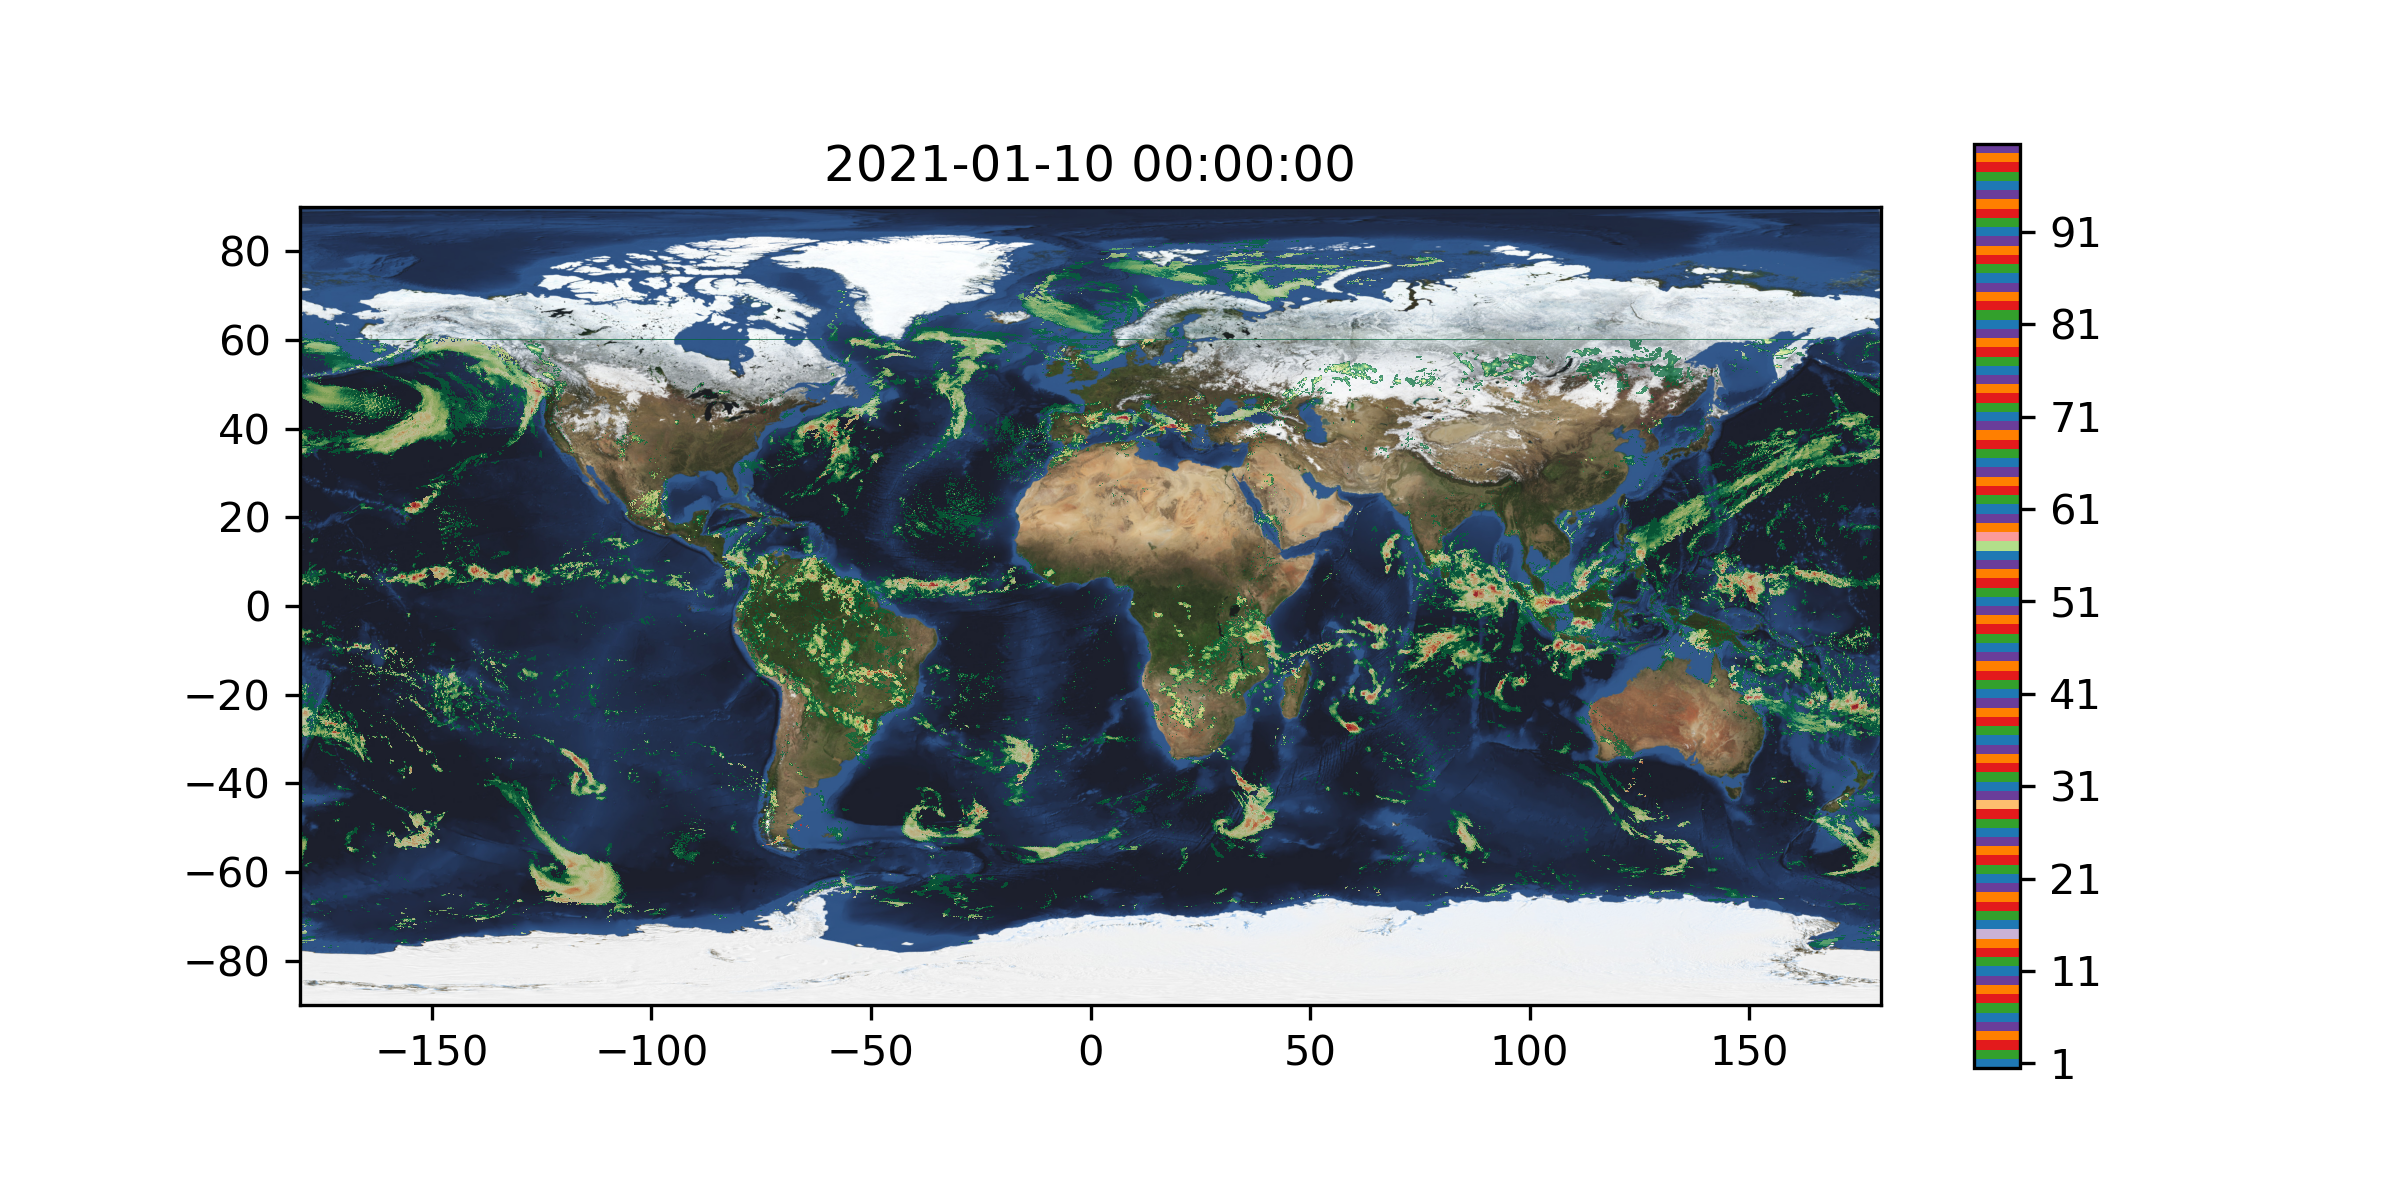

In [67]:
fig = plt.figure(figsize=(8, 4), dpi=300)
ax = fig.add_subplot()

ax.imshow(bm, extent=[-180, 180, -90, 90], alpha=0.9)
ax.set_title(timestamps[0])    

# Initializing
im = ax.imshow(imerg[0], 
               cmap='RdYlGn_r',
               interpolation='none',
               extent=[-180, 180, -90, 90],
               alpha=0.7,
               norm=LogNorm(vmin=0.1, vmax=53))

cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.1)

s = sdf[0:1].plot(ax=ax, zorder=1, linewidth=0.0, 
              column='label', 
              cmap=cm, alpha=0.5, legend=False,
              legend_kwds={'label': "Event Label"})

# Overwriting the legend
matplotlib.colorbar.Colorbar(ax.figure.axes[1], cmap=cm, values=range(1,101), ticks=range(1,101,10))
fig.savefig(f'{data_dir}/animations/0_init.png', bbox_inches='tight')

for timestamp in timestamps[0:1]:
    plt.cla()
    ax.set_title(timestamp)    
    ax.imshow(bm, extent=[-180, 180, -90, 90], alpha=0.9)
    #ax.set_xlim(-130, -70)
    #ax.set_ylim(20, 50)
    #print(timestamp)
    subset = sdf[sdf.timestamp==timestamp]
    subset = geopandas.GeoDataFrame(subset)
    
    subset.plot(ax=ax, zorder=1, linewidth=0.0, column='label', cmap=cm, alpha=0.5)
    bounds = subset.set_geometry(subset.boundary)
    bounds.plot(ax=ax, zorder=1, linewidth=0.05, color='k', alpha=0.5)
    bounds.plot(ax=ax, zorder=1, linewidth=0.025, column='label', cmap=cm, alpha=0.5)
    
    #bounds.plot(ax=ax, zorder=1, linewidth=0.5, column='label',  cmap=cm)

    n = timestamps.index(timestamp)
    im = ax.imshow(imerg[n], 
                   cmap='RdYlGn_r',
                   interpolation='none',
                   extent=[-180, 180, -90, 90],
                   alpha=0.5,
                   norm=LogNorm(vmin=0.1, vmax=53))
    
    fig.savefig(f'{data_dir}/animations/{timestamp}.png', bbox_inches='tight')

In [44]:
1

1

# Animation

NameError: name 'data' is not defined

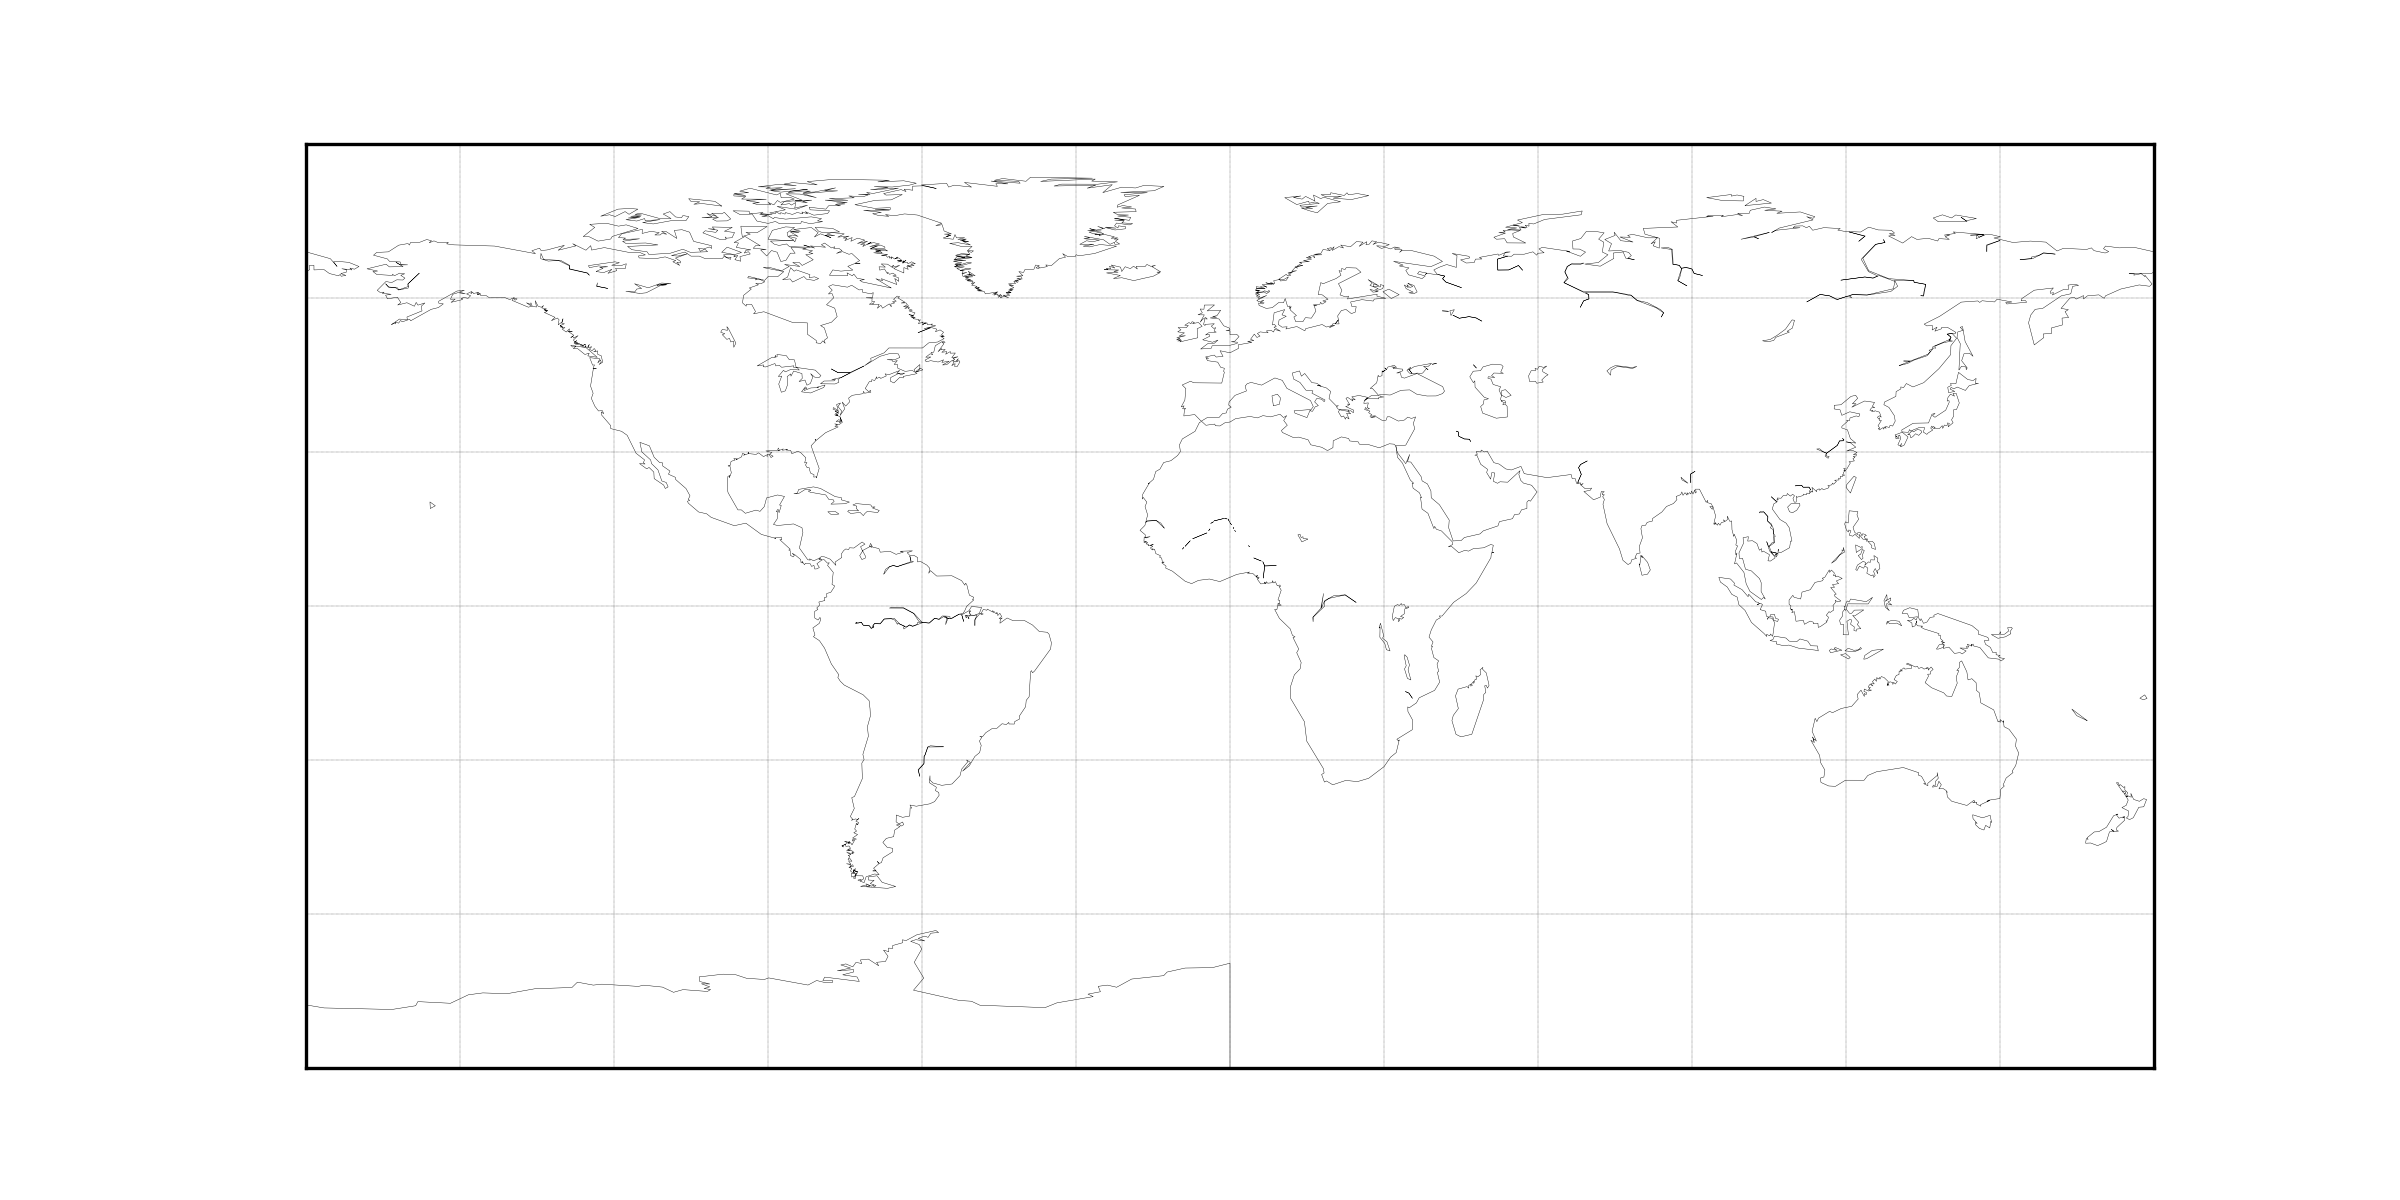

In [8]:
fig = plt.figure(figsize=(8, 4), dpi=300)
ax = fig.add_subplot(111)

m = Basemap(projection='cyl')
#m = Basemap(projection='moll', lon_0=-105)
#m = Basemap(projection='ortho', lon_0=0, lat_0=0, resolution='l')
#m = Basemap(projection='geos', lon_0=-65, lat_0=-30, satellite_height=h*1000, resolution='l')

m.drawcoastlines(0.1)
m.drawparallels(numpy.arange(-90.,120.,30.), linewidth=0.1)
m.drawmeridians(numpy.arange(0, 360, 30), linewidth=0.1)

#m.fillcontinents(color='coral', lake_color='coral')
#m.drawlsmask(land_color = "#ddaa66", ocean_color="#7777ff", resolution = 'l')
#m.drawmapboundary(fill_color='aqua')

ax.imshow(numpy.fliplr(numpy.rot90(data.T, 3)), extent=[-180, 180, -90, 90], alpha=0.7)

frames = []
for row in sdf[sdf.label==1].trixels:
    patches = []
    for subpoly in row.geoms:        
        patch = make_patch(subpoly, m)
        patches.append(patch)
    frames.append(patches)
    
frame = matplotlib.collections.PatchCollection(frames[0])
frame.set(edgecolor='red', linewidth=0.2, facecolor='white')
ax.add_collection(frame)

def animate(i):
    frame.set_paths(frames[i])
    ax.set_title(sdf.timestamp[i])
    
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames), interval=100, blit=False)

anim.save('animations/trixels.mp4', fps=10)
anim.save('animations/trixels.gif', fps=10)
plt.show()

In [ ]:
matplotlib.pyplot.close(fig)